# Análisis  de los datos reducidos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from collections import Counter
from random import random
path = "./Datasets/Saber_reducido.csv"

In [124]:
def pertenece(a, b):
    for i in range(1,len(b)):
        if a>= b[i-1] and a<= b[i]:
            return i-1

def reemplazoGeneralizado(data):
    columns = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA","ESTU_NSE_INDIVIDUAL"]
    for c in columns:
        aux4 =0
        reemplazables = []
        if '-' in data.groupby(c).count().index:
            reemplazables.append(data.groupby(c).get_group('-').index.values)
        opciones = []
        porcentajes = [0]
        opciones.append(list(data.groupby(c).size().axes[0]))
        aux = len(opciones[0])
        if '-' in opciones[0]:
            opciones[0].remove('-')
            aux = aux-1
            aux2 = (data.groupby(c).size()['-']/data.shape[0])/aux
        else:
            continue
        for i in range(aux):
            aux3 = porcentajes.pop()
            porcentajes.append(aux3)
            a= float(data.groupby(c).size()[opciones[0][i]]/data.shape[0])+aux2+aux3
            porcentajes.append(a)
        if len(reemplazables) > 0:   
            for r in reemplazables[0]:
                randNumber = random()
                for j in range(len(opciones[0])):
                    lugar = pertenece(randNumber, porcentajes)
                    data.at[r, c] = opciones[0][lugar]

def puntajeGlobalCategorico(x):
    x=int(x)
    if x<=50:
        return 1
    elif x<=100:
        return 2
    elif x<=150:
        return 3
    elif x<=200:
        return 4
    elif x<=250:
        return 5
    elif x<=300:
        return 6
    elif x<=350:
        return 7
    elif x<=400:
        return 8
    elif x<=450:
        return 9
    else:
        return 10


def inseIndividualCategorico(x):
    x=int(x)
    if x<=5:
        return 1
    elif x<=10:
        return 2
    elif x<=15:
        return 3
    elif x<=20:
        return 4
    elif x<=25:
        return 5
    elif x<=30:
        return 6
    elif x<=35:
        return 7
    elif x<=40:
        return 8
    elif x<=45:
        return 9
    elif x<=50:
        return 10
    elif x<=55:
        return 11
    elif x<=60:
        return 12
    elif x<=65:
        return 13
    elif x<=70:
        return 14
    elif x<=75:
        return 15
    elif x<=80:
        return 16
    elif x<=85:
        return 17
    elif x<=90:
        return 18
    elif x<=95:
        return 19
    else:
        return 20

    
def puntajeCategorico(x):
    x=int(x)
    if x<=10:
        return 1
    elif x<=20:
        return 2
    elif x<=30:
        return 3
    elif x<=40:
        return 4
    elif x<=50:
        return 5
    elif x<=60:
        return 6
    elif x<=70:
        return 7
    elif x<=80:
        return 8
    elif x<=90:
        return 9
    else:
        return 10
    


In [3]:
Keys = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_GLOBAL", "ESTU_NSE_ESTABLECIMIENTO", "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"]

In [4]:
tmp = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA ","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA COLE_BILINGUE","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL",
]

for element in Keys:
    if element not in tmp:
        print(element)


ELECTRODOMESTICOS
ESTU_DEDICACIONLECTURADIARIA
COLE_NATURALEZA


In [5]:
data = pd.read_csv(path, low_memory=False)

In [6]:
reemplazoGeneralizado(data)

## Discretizacion ESTU_INSE_INDIVIDUAL

In [7]:
# to integer
data['ESTU_INSE_INDIVIDUAL'] = data.apply(lambda x: round(x['ESTU_INSE_INDIVIDUAL'], 0),axis=1)

In [8]:
data.head()

,ELECTRODOMESTICOS,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,10010,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,...,MAÑANA,63,69,54,57,65.0,305,2.0,53.0,NSE3
1,10010,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,...,UNICA,54,50,50,40,48.0,242,2.0,45.0,NSE2
2,0,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,...,MAÑANA,59,43,46,45,47.0,241,2.0,45.0,NSE2
3,11101,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,...,MAÑANA,61,60,60,67,63.0,310,3.0,74.0,NSE4
4,10000,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,...,COMPLETA,56,51,48,49,56.0,257,3.0,49.0,NSE2


In [9]:
data.iloc[0]

ELECTRODOMESTICOS                                                       10010
ESTU_GENERO                                                                 M
ESTU_FECHANACIMIENTO                                                       16
PERIODO                                                                 20182
ESTU_DEPTO_RESIDE                                                   ATLANTICO
FAMI_ESTRATOVIVIENDA                                                Estrato 2
FAMI_PERSONASHOGAR                                                      7 a 8
FAMI_CUARTOSHOGAR                                                      Cuatro
FAMI_EDUCACIONPADRE                                                   No sabe
FAMI_EDUCACIONMADRE                                                   No sabe
FAMI_TRABAJOLABORPADRE           Es vendedor o trabaja en atención al público
FAMI_TRABAJOLABORMADRE           Es vendedor o trabaja en atención al público
FAMI_NUMLIBROS                                                26

In [10]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()  

ESTU_NSE_INDIVIDUAL
NSE1    164569
NSE2    394557
NSE3    374915
NSE4     81278
dtype: int64

In [11]:
type(data.groupby("FAMI_NUMLIBROS").size())

pandas.core.series.Series

In [12]:
#data.groupby("ESTU_GENERO").get_group('-').index.values

In [13]:
data.groupby("FAMI_TRABAJOLABORMADRE").size() 

FAMI_TRABAJOLABORMADRE
Es agricultor, pesquero o jornalero                                                                      28745
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                             15173
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc     87784
Es operario de máquinas o conduce vehículos (taxita, chofer)                                             16769
Es vendedor o trabaja en atención al público                                                             79081
No aplica                                                                                                48274
No sabe                                                                                                  25142
Pensionado                                                                                                6694
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)   

In [14]:
data.groupby("FAMI_EDUCACIONMADRE").size()

FAMI_EDUCACIONMADRE
Educación profesional completa          104923
Educación profesional incompleta         24810
Ninguno                                  21296
No Aplica                                 1754
No sabe                                  17664
Postgrado                                21258
Primaria completa                       112567
Primaria incompleta                     158062
Secundaria (Bachillerato) completa      261914
Secundaria (Bachillerato) incompleta    157323
Técnica o tecnológica completa          102548
Técnica o tecnológica incompleta         31200
dtype: int64

In [15]:
data.groupby("FAMI_EDUCACIONPADRE").size()

FAMI_EDUCACIONPADRE
Educación profesional completa           92586
Educación profesional incompleta         20236
Ninguno                                  34522
No Aplica                                10218
No sabe                                  62892
Postgrado                                18717
Primaria completa                       111362
Primaria incompleta                     201124
Secundaria (Bachillerato) completa      226042
Secundaria (Bachillerato) incompleta    146782
Técnica o tecnológica completa           69731
Técnica o tecnológica incompleta         21107
dtype: int64

In [16]:
data.groupby("FAMI_CUARTOSHOGAR").size()

FAMI_CUARTOSHOGAR
Cinco          40983
Cuatro        134475
Dos           365532
Seis o mas     21869
Tres          399597
Uno            52863
dtype: int64

In [17]:
data.groupby("FAMI_PERSONASHOGAR").size()

FAMI_PERSONASHOGAR
1 a 2       73707
3 a 4      485249
5 a 6      332157
7 a 8       88621
9 o más     35585
dtype: int64

## Histogramas

In [18]:
data.groupby("COLE_JORNADA").size()

COLE_JORNADA
COMPLETA    184979
MAÑANA      523472
NOCHE        48127
SABATINA     53347
TARDE       132572
UNICA        72822
dtype: int64

In [19]:
data.groupby("FAMI_ESTRATOVIVIENDA").size()/data.shape[0] * 100

FAMI_ESTRATOVIVIENDA
Estrato 1      33.231132
Estrato 2      36.629473
Estrato 3      20.492180
Estrato 4       4.705221
Estrato 5       1.550843
Estrato 6       0.745086
Sin Estrato     2.646065
dtype: float64

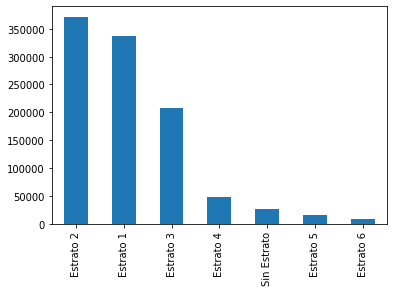

In [20]:
data['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar')

In [21]:
data.groupby("ESTU_FECHANACIMIENTO").size()

ESTU_FECHANACIMIENTO
14      1376
15     37302
16    373165
17    336231
18    167616
19     63029
20     21248
21      9541
22      5811
dtype: int64

<class 'matplotlib.axes._subplots.AxesSubplot'>


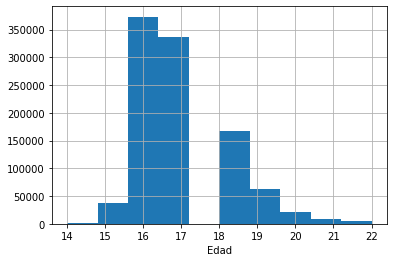

In [22]:
hist = data["ESTU_FECHANACIMIENTO"].hist()
hist.set_xlabel("Edad")
print(type(hist))

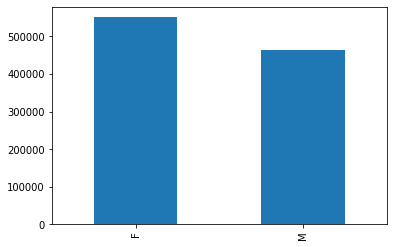

In [23]:
data['ESTU_GENERO'].value_counts().plot(kind='bar')

In [24]:
#data.groupby("ESTU_INSE_INDIVIDUAL").size()
print("min",data["ESTU_INSE_INDIVIDUAL"].min())
print("max",data["ESTU_INSE_INDIVIDUAL"].max())


min 13.0
max 85.0


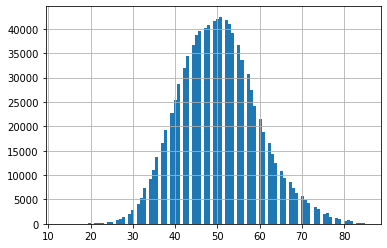

In [25]:
data['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

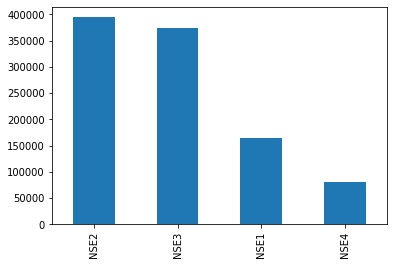

In [26]:
data["ESTU_NSE_INDIVIDUAL"].value_counts().plot(kind ='bar')

In [27]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()

ESTU_NSE_INDIVIDUAL
NSE1    164569
NSE2    394557
NSE3    374915
NSE4     81278
dtype: int64

In [28]:
n = len(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size())
for i in range(1,n+1):
    print(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size()[i])

72076
545146
351248
45744


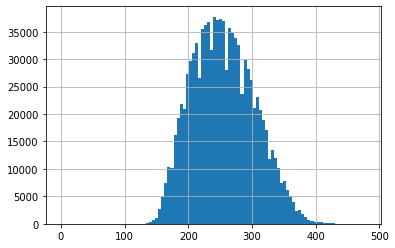

In [29]:
data["PUNT_GLOBAL"].hist(bins = 100)

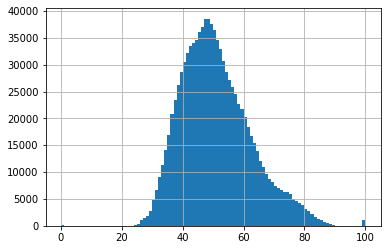

In [30]:
data["PUNT_INGLES"].hist(bins = 100)

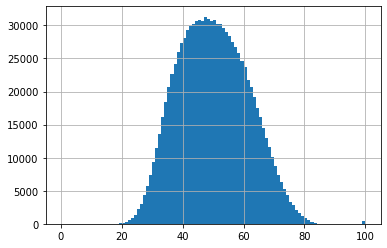

In [31]:
data["PUNT_SOCIALES_CIUDADANAS"].hist(bins = 100)

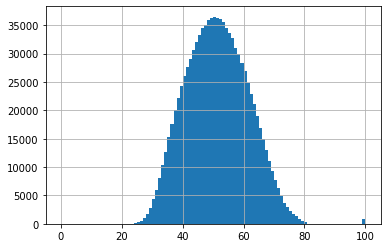

In [32]:
data["PUNT_C_NATURALES"].hist(bins = 100)

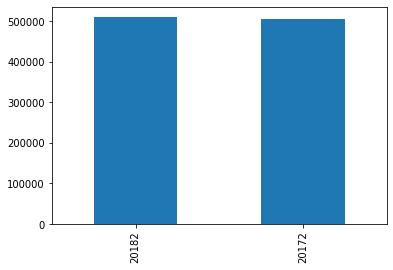

In [33]:
data["PERIODO"].value_counts().plot(kind ='bar')

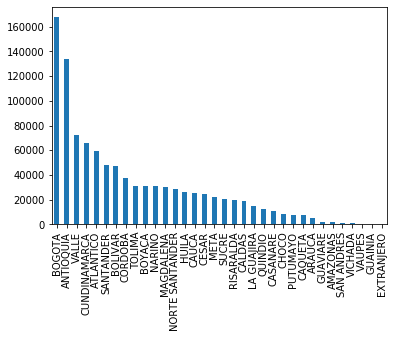

In [34]:
data["ESTU_DEPTO_RESIDE"].value_counts().plot(kind ='bar')

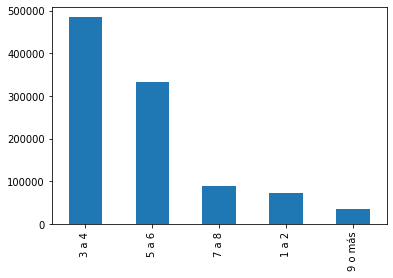

In [35]:
data["FAMI_PERSONASHOGAR"].value_counts().plot(kind ='bar')

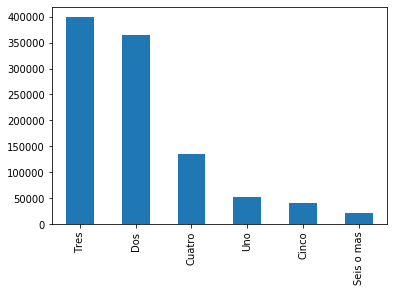

In [36]:
data["FAMI_CUARTOSHOGAR"].value_counts().plot(kind ='bar')

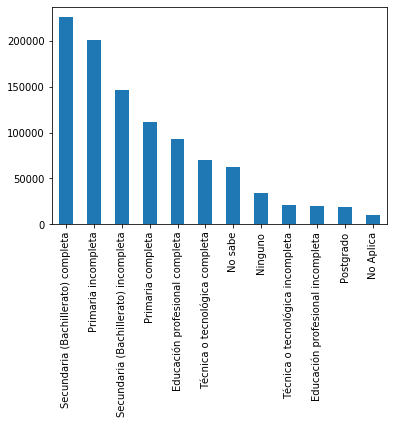

In [37]:
data["FAMI_EDUCACIONPADRE"].value_counts().plot(kind ='bar')

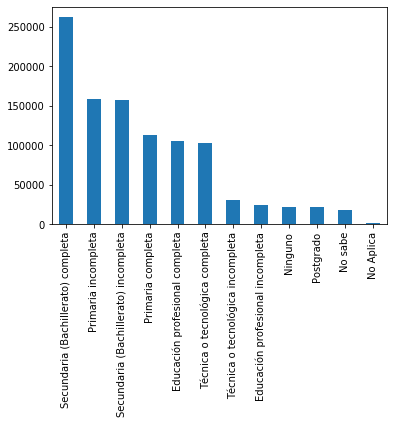

In [38]:
data["FAMI_EDUCACIONMADRE"].value_counts().plot(kind ='bar')

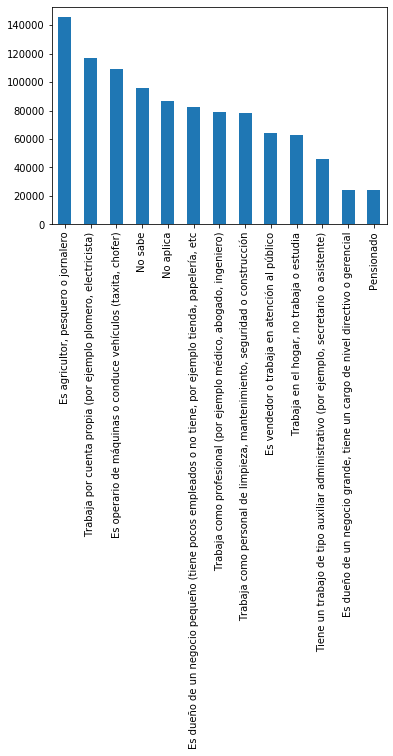

In [39]:
data["FAMI_TRABAJOLABORPADRE"].value_counts().plot(kind ='bar')


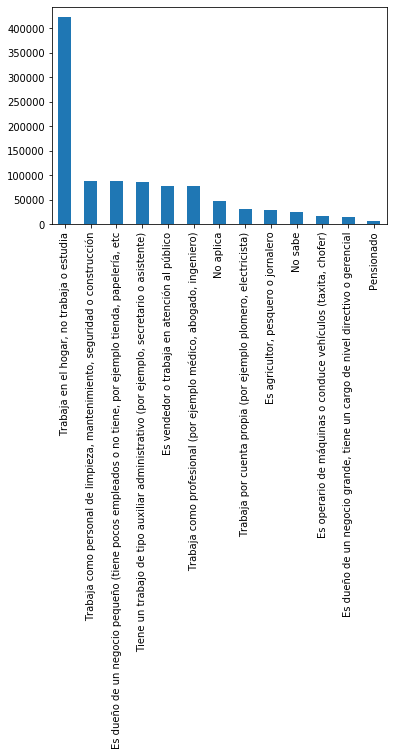

In [40]:
data["FAMI_TRABAJOLABORMADRE"].value_counts().plot(kind ='bar')

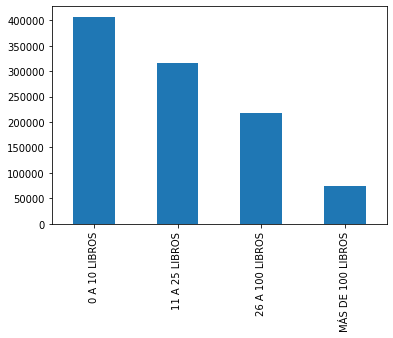

In [41]:
data["FAMI_NUMLIBROS"].value_counts().plot(kind ='bar')

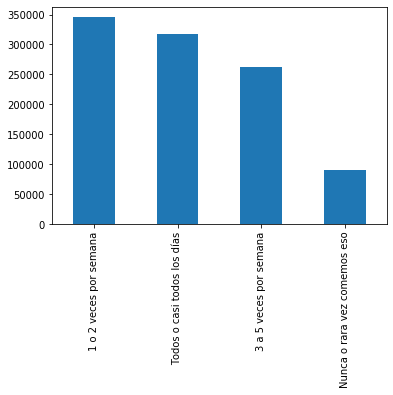

In [42]:
data["FAMI_COMELECHEDERIVADOS"].value_counts().plot(kind ='bar')

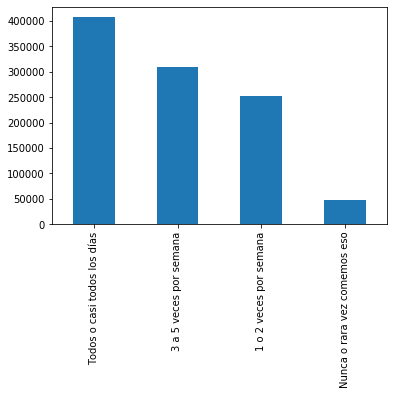

In [43]:
data["FAMI_COMECARNEPESCADOHUEVO"].value_counts().plot(kind ='bar')

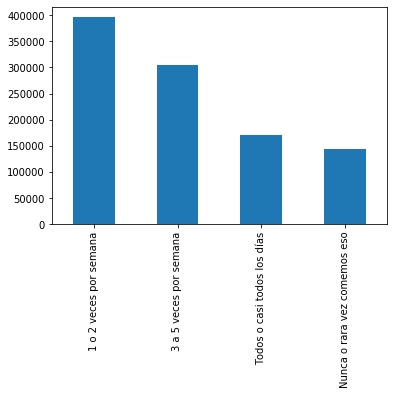

In [44]:
data["FAMI_COMECEREALFRUTOSLEGUMBRE"].value_counts().plot(kind ='bar')

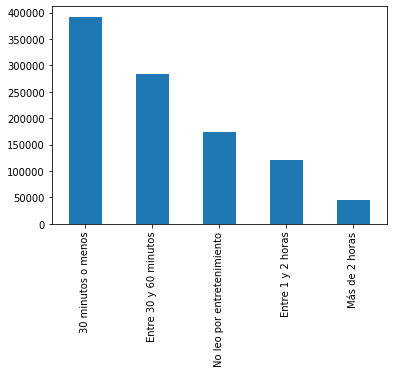

In [45]:
data["ESTU_DEDICACIONLECTURADIARIA"].value_counts().plot(kind ='bar')

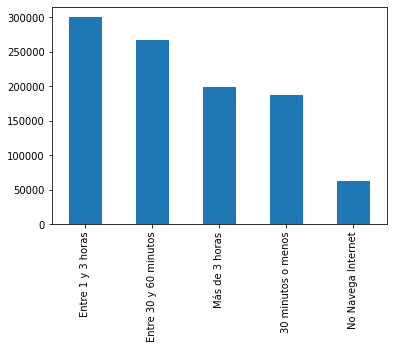

In [46]:
data["ESTU_DEDICACIONINTERNET"].value_counts().plot(kind ='bar')

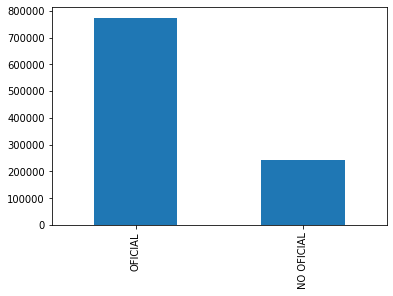

In [47]:
data["COLE_NATURALEZA"].value_counts().plot(kind ='bar')

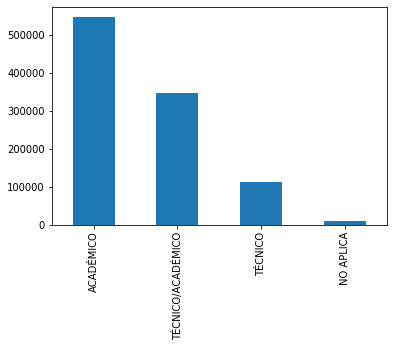

In [48]:
data["COLE_CARACTER"].value_counts().plot(kind ='bar')

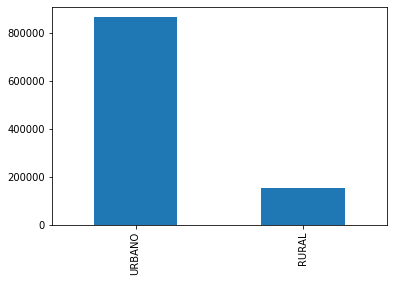

In [49]:
data["COLE_AREA_UBICACION"].value_counts().plot(kind ='bar')

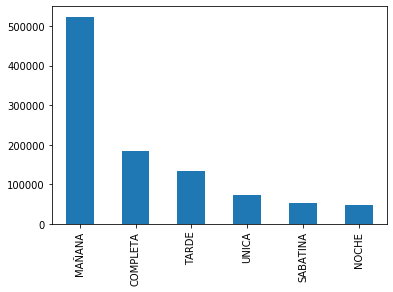

In [50]:
data["COLE_JORNADA"].value_counts().plot(kind ='bar')

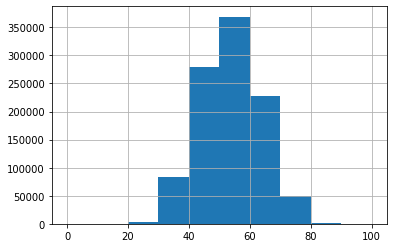

In [51]:
data["PUNT_LECTURA_CRITICA"].hist()

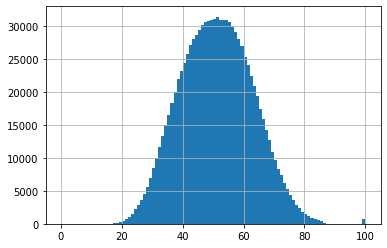

In [52]:
data["PUNT_MATEMATICAS"].hist(bins = 100)

In [53]:
data.groupby("PUNT_MATEMATICAS").size()

PUNT_MATEMATICAS
0          6
15        11
16        21
17        77
18       147
19       260
20       413
21       707
22      1006
23      1530
24      2189
25      2874
26      3623
27      4589
28      5628
29      6930
30      8411
31      9926
32     11642
33     13301
34     14968
35     16488
36     18272
37     20024
38     21938
39     23150
40     24453
41     25772
42     27210
43     28068
       ...  
59     26933
60     25288
61     24149
62     22502
63     20927
64     19414
65     17402
66     15844
67     14263
68     12690
69     10888
70      9628
71      8272
72      7350
73      6181
74      5307
75      4317
76      3574
77      2830
78      2329
79      1866
80      1459
81      1197
82       925
83       660
84       516
85       391
86        67
87         5
100      790
Length: 75, dtype: int64

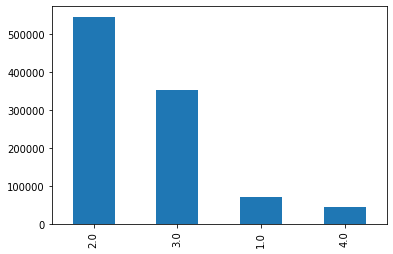

In [54]:
data["ESTU_NSE_ESTABLECIMIENTO"].value_counts().plot(kind ='bar')

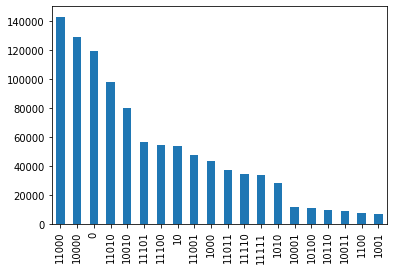

In [55]:
data["ELECTRODOMESTICOS"].value_counts().plot(kind ='bar')

In [56]:
data.groupby("ELECTRODOMESTICOS").size().sort_values(ascending=False)/data.shape[0]*100

ELECTRODOMESTICOS
11000    14.087395
10000    12.695222
0        11.784966
11010     9.678732
10010     7.873683
11101     5.564458
11100     5.365407
10        5.284349
11001     4.715168
1000      4.273238
11011     3.668896
11110     3.372044
11111     3.341314
1010      2.773611
10001     1.161901
10100     1.081335
10110     0.959994
10011     0.912915
1100      0.755231
1001      0.650140
dtype: float64

In [57]:
data.shape

(1015319, 31)

## Correlacion de pearson

In [58]:
print(data.PUNT_GLOBAL.corr(data.ESTU_INSE_INDIVIDUAL, method="pearson"))

0.4348155519188581


In [59]:
data.corr(method="pearson")

,ELECTRODOMESTICOS,ESTU_FECHANACIMIENTO,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL
ELECTRODOMESTICOS,1.000000,-0.131716,0.006306,0.161448,0.163551,0.163479,0.148608,0.205841,0.181479,0.307328,0.519097
ESTU_FECHANACIMIENTO,-0.131716,1.000000,-0.003332,-0.262915,-0.301661,-0.288391,-0.243595,-0.265464,-0.304825,-0.150855,-0.230079
PERIODO,0.006306,-0.003332,1.000000,-0.033390,0.004813,-0.084233,-0.089920,0.046766,-0.046865,0.022286,-0.018477
PUNT_LECTURA_CRITICA,0.161448,-0.262915,-0.033390,1.000000,0.735875,0.749057,0.801586,0.659955,0.895540,0.382571,0.388413
PUNT_MATEMATICAS,0.163551,-0.301661,0.004813,0.735875,1.000000,0.797961,0.743861,0.662148,0.903941,0.373868,0.382414
PUNT_C_NATURALES,0.163479,-0.288391,-0.084233,0.749057,0.797961,1.000000,0.797822,0.680637,0.915557,0.360940,0.376194
PUNT_SOCIALES_CIUDADANAS,0.148608,-0.243595,-0.089920,0.801586,0.743861,0.797822,1.000000,0.669289,0.917890,0.370963,0.379605
PUNT_INGLES,0.205841,-0.265464,0.046766,0.659955,0.662148,0.680637,0.669289,1.000000,0.774099,0.471297,0.488795
PUNT_GLOBAL,0.181479,-0.304825,-0.046865,0.895540,0.903941,0.915557,0.917890,0.774099,1.000000,0.423465,0.434816
ESTU_NSE_ESTABLECIMIENTO,0.307328,-0.150855,0.022286,0.382571,0.373868,0.360940,0.370963,0.471297,0.423465,1.000000,0.630593


## Diagramas de caja

Text(0.5, 0, 'Edad')

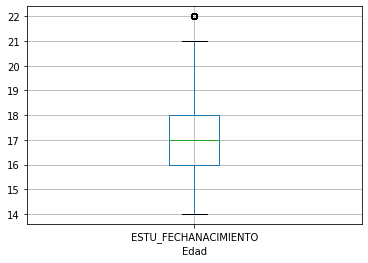

In [60]:
hist = data.boxplot(column=['ESTU_FECHANACIMIENTO'])
hist.set_xlabel("Edad")

In [61]:
dataAge = data[data['ESTU_FECHANACIMIENTO'] > 22]
dataAge.groupby("ESTU_FECHANACIMIENTO").size()/data.shape[0]*100

Series([], dtype: float64)

## Tablas de contingencia

In [62]:
pd.crosstab(data['FAMI_EDUCACIONPADRE'], [data['FAMI_EDUCACIONMADRE']])/data.shape[0]*100

FAMI_EDUCACIONMADRE,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
FAMI_EDUCACIONPADRE,,,,,,,,,,,,
Educación profesional completa,3.965552,0.541308,0.027282,0.014478,0.113560,0.443112,0.187527,0.227022,1.519325,0.513336,1.298114,0.268290
Educación profesional incompleta,0.441536,0.331620,0.009258,0.006599,0.024524,0.094946,0.059292,0.055746,0.391404,0.166844,0.308868,0.102431
Ninguno,0.068747,0.022358,0.821909,0.007288,0.028858,0.010440,0.459068,0.994170,0.422724,0.432475,0.083718,0.048359
No Aplica,0.109916,0.029153,0.014380,0.043632,0.018122,0.028562,0.093862,0.130205,0.242584,0.140941,0.119765,0.035260
No sabe,0.605032,0.155321,0.058307,0.013789,0.915673,0.107848,0.507525,0.685302,1.468996,0.883466,0.624730,0.168321
Postgrado,0.509594,0.086180,0.004531,0.004925,0.021668,0.756905,0.022259,0.027184,0.152760,0.051117,0.171769,0.034570
Primaria completa,0.328074,0.090316,0.217961,0.009948,0.077808,0.045601,3.516530,1.834103,2.421505,1.715126,0.525155,0.186050
Primaria incompleta,0.427846,0.118485,0.589076,0.017137,0.120258,0.055451,3.052046,8.192401,3.196138,3.105428,0.690423,0.244258
Secundaria (Bachillerato) completa,1.836960,0.470985,0.148328,0.023638,0.200331,0.241500,1.495392,1.448116,10.115442,2.961926,2.517435,0.803097


In [63]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['FAMI_PERSONASHOGAR']])/data.shape[0]*100


FAMI_PERSONASHOGAR,1 a 2,3 a 4,5 a 6,7 a 8,9 o más
FAMI_ESTRATOVIVIENDA,,,,,
Estrato 1,2.168284,14.035589,11.965599,3.666434,1.395227
Estrato 2,2.704470,18.080524,11.849182,2.870822,1.124474
Estrato 3,1.629636,10.935972,6.018700,1.344110,0.563764
Estrato 4,0.392487,2.660445,1.272014,0.265828,0.114447
Estrato 5,0.131683,0.831266,0.441536,0.102923,0.043435
Estrato 6,0.058208,0.360182,0.223575,0.064315,0.038806
Sin Estrato,0.174723,0.888785,0.943940,0.413959,0.224658


In [64]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['ESTU_NSE_INDIVIDUAL']])/data.shape[0] * 100

ESTU_NSE_INDIVIDUAL,NSE1,NSE2,NSE3,NSE4
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,10.158876,16.577253,6.194900,0.300103
Estrato 2,3.627431,15.204187,16.374755,1.423100
Estrato 3,0.859828,4.571076,11.716613,3.344663
Estrato 4,0.241894,0.783793,1.754030,1.925503
Estrato 5,0.109818,0.340189,0.401943,0.698894
Estrato 6,0.073474,0.227022,0.162215,0.282374
Sin Estrato,1.137278,1.156878,0.321377,0.030532


In [65]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['COLE_AREA_UBICACION']])/data.shape[0] * 100

COLE_AREA_UBICACION,RURAL,URBANO
FAMI_ESTRATOVIVIENDA,,
Estrato 1,7.472430,25.758702
Estrato 2,4.033806,32.595667
Estrato 3,1.472641,19.019540
Estrato 4,0.519443,4.185778
Estrato 5,0.226136,1.324707
Estrato 6,0.141729,0.603357
Sin Estrato,1.109799,1.536266


In [66]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['ESTU_FECHANACIMIENTO']])

ESTU_FECHANACIMIENTO,14,15,16,17,18,19,20,21,22
FAMI_ESTRATOVIVIENDA,,,,,,,,,
Estrato 1,516,13173,113349,109769,60033,24672,9143,4201,2546
Estrato 2,454,13873,142786,122529,59571,21418,6612,2872,1791
Estrato 3,256,7260,83595,70324,31322,10358,2972,1222,752
Estrato 4,72,1523,19075,16726,6910,2248,705,306,208
Estrato 5,22,398,5299,5929,2665,893,315,139,86
Estrato 6,6,163,2081,2753,1596,566,232,117,51
Sin Estrato,50,912,6980,8201,5519,2874,1269,684,377


In [67]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['FAMI_NUMLIBROS']])

FAMI_NUMLIBROS,0 A 10 LIBROS,11 A 25 LIBROS,26 A 100 LIBROS,MÁS DE 100 LIBROS
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,174245,100405,49249,13503
Estrato 2,143552,123065,81788,23501
Estrato 3,58937,65993,60582,22549
Estrato 4,10182,13097,15907,8587
Estrato 5,3334,3948,5215,3249
Estrato 6,1834,1831,2211,1689
Sin Estrato,15009,7053,3265,1539


## Diagramas de dispersion

Text(0, 0.5, 'ESTU_INSE_INDIVIDUAL')

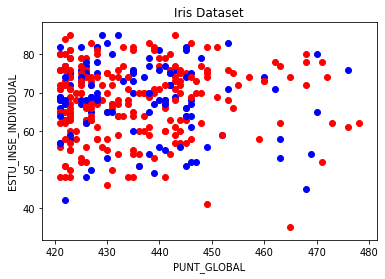

In [68]:
colors = {'M':'r', 'F':'b'}
fig, ax = plt.subplots()
for i in range(1000000):
    if data['PUNT_GLOBAL'][i] > 420:
        ax.scatter(data['PUNT_GLOBAL'][i], data['ESTU_INSE_INDIVIDUAL'][i],color=colors[data['ESTU_GENERO'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('PUNT_GLOBAL')
ax.set_ylabel('ESTU_INSE_INDIVIDUAL')

Text(0, 0.5, 'ESTU_INSE_INDIVIDUAL')

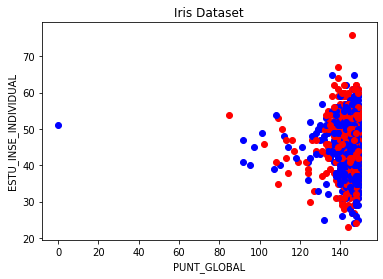

In [69]:
colors = {'M':'r', 'F':'b'}
fig, ax = plt.subplots()
for i in range(1000000):
    if data['PUNT_GLOBAL'][i] < 150:
        ax.scatter(data['PUNT_GLOBAL'][i], data['ESTU_INSE_INDIVIDUAL'][i],color=colors[data['ESTU_GENERO'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('PUNT_GLOBAL')
ax.set_ylabel('ESTU_INSE_INDIVIDUAL')

# Entropia

In [70]:
columnEval = ["FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS"]

In [71]:
def EntropySum(n):
    if n == 0:
        return 0
    if n == 1:
        return 0
    else:
        return n*math.log(n,2)+(1-n)*math.log(1-n,2)

def compare(i,j,colPass):
    count = 0
    for col in columnEval:
        if data.iloc[i][col] == data.iloc[j][col]:
            if col != colPass:
                count+=1
    return count

In [72]:
entropy = 0
dataSize = 1000 #data.shape[0]

"""
for i in range(dataSize):
    for j in range(i+1,dataSize):
        result = compare(i, j, "")
        entropy += EntropySum(result/data.shape[1])
        #if j%100 == 0:
        #    print("R",i,j,"=",result)
    print("R",i,j,"=",entropy)
print("EntropyTotal",entropy*-1)
"""


'\nfor i in range(dataSize):\n    for j in range(i+1,dataSize):\n        result = compare(i, j, "")\n        entropy += EntropySum(result/data.shape[1])\n        #if j%100 == 0:\n        #    print("R",i,j,"=",result)\n    print("R",i,j,"=",entropy)\nprint("EntropyTotal",entropy*-1)\n'

## crear csv para k-modes transformar todos los datos en categoricos

In [73]:
data.groupby("PUNT_GLOBAL").size()

PUNT_GLOBAL
0       2
17      1
36      1
52      1
58      1
78      1
85      1
92      4
93      2
95      2
96      1
97      1
98      1
101     1
102     1
104     2
105     2
106     1
107     2
108     2
109     2
110     2
111     1
112     2
113     4
114     2
116     1
117     1
118     1
119     1
       ..
439     7
440     7
441    14
442     9
443    11
444    11
445    11
446    10
447     3
448     4
449     6
451     2
452     2
453     5
454     2
455     1
457     1
459     1
460     3
462     2
463     4
465     2
468     4
469     1
470     2
471     2
472     1
473     1
476     2
478     1
Length: 379, dtype: int64

In [99]:
data["ESTU_INSE_INDIVIDUAL"] = data["ESTU_INSE_INDIVIDUAL"].fillna(50.0)

In [119]:
data["PUNT_INGLES"] = data["PUNT_INGLES"].fillna(50.0)

In [74]:
data["PUNT_GLOBAL"] = data.apply(lambda x: puntajeGlobalCategorico(x["PUNT_GLOBAL"]),axis=1 )

In [105]:
data["PUNT_LECTURA_CRITICA"] = data.apply(lambda x: puntajeCategorico(x["PUNT_LECTURA_CRITICA"]),axis=1 )

In [107]:
data["PUNT_MATEMATICAS"] = data.apply(lambda x: puntajeCategorico(x["PUNT_MATEMATICAS"]),axis=1 )

In [109]:
data["PUNT_C_NATURALES"] = data.apply(lambda x: puntajeCategorico(x["PUNT_C_NATURALES"]),axis=1 )

In [112]:
data["PUNT_SOCIALES_CIUDADANAS"] = data.apply(lambda x: puntajeCategorico(x["PUNT_SOCIALES_CIUDADANAS"]),axis=1 )

In [121]:
data["PUNT_INGLES"] = data.apply(lambda x: puntajeCategorico(x["PUNT_INGLES"]),axis=1 )

In [126]:
data["ESTU_INSE_INDIVIDUAL"] = data.apply(lambda x: inseIndividualCategorico(x["ESTU_INSE_INDIVIDUAL"]),axis=1 ) 

In [127]:
data.groupby("ESTU_INSE_INDIVIDUAL").size()

ESTU_INSE_INDIVIDUAL
3         15
4        147
5       1181
6       8142
7      36870
8      97511
9     170400
10    225940
11    201013
12    137467
13     73095
14     37439
15     17717
16      6360
17      2022
dtype: int64

In [85]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()

ESTU_NSE_INDIVIDUAL
NSE1    164569
NSE2    394557
NSE3    374915
NSE4     81278
dtype: int64

In [76]:
data.head()

,ELECTRODOMESTICOS,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,10010,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,...,MAÑANA,63,69,54,57,65.0,7,2.0,53.0,NSE3
1,10010,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,...,UNICA,54,50,50,40,48.0,5,2.0,45.0,NSE2
2,0,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,...,MAÑANA,59,43,46,45,47.0,5,2.0,45.0,NSE2
3,11101,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,...,MAÑANA,61,60,60,67,63.0,7,3.0,74.0,NSE4
4,10000,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,...,COMPLETA,56,51,48,49,56.0,6,3.0,49.0,NSE2


In [103]:
data.columns

Index(['ELECTRODOMESTICOS', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
       'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO',
       'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'COLE_NATURALEZA', 'COLE_CARACTER',
       'COLE_AREA_UBICACION', 'COLE_JORNADA', 'PUNT_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL'],
      dtype='object')

'ELECTRODOMESTICOS', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
        'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'COLE_NATURALEZA', 'COLE_CARACTER',
       'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL'

In [78]:
#dropData =data.drop(columns=['FAMI_COMELECHEDERIVADOS','PERIODO','PUNT_INGLES','FAMI_COMECARNEPESCADOHUEVO','PUNT_LECTURA_CRITICA','PUNT_C_NATURALES','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS','FAMI_COMECEREALFRUTOSLEGUMBRE'])

In [79]:
arr = ['ELECTRODOMESTICOS', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
       'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'COLE_NATURALEZA', 'COLE_CARACTER',
       'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL']
len(arr)

22

In [80]:
#dropData.to_csv('kModesData.csv',header=True,index=False)

In [129]:
data.to_csv('kModesData.csv',header=True,index=False)